# Discussion On Outlier And Its Impacts On Machine Learning UseCases

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('titanic.csv')

In [3]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df['Age'].isnull().sum()

177

In [6]:
import seaborn as sns

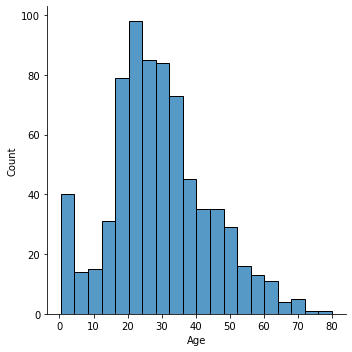

In [7]:
sns.displot(df['Age'].dropna())

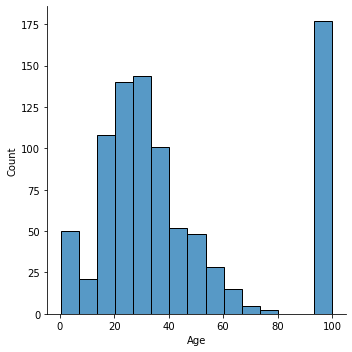

In [8]:
sns.displot(df['Age'].fillna(100))

Text(0, 0.5, 'No of passenger')

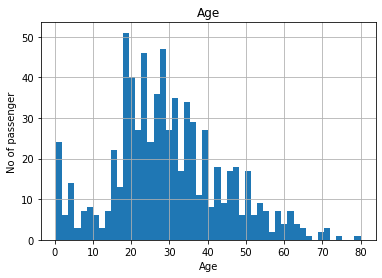

In [9]:
figure=df.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of passenger')

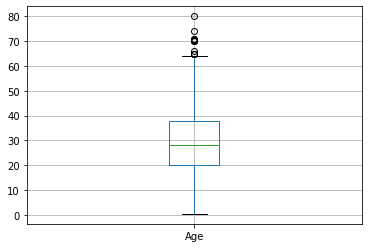

In [10]:
figure=df.boxplot(column='Age')

In [11]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [17]:
##assuming age follows gausina distribution  we will calculated the boudries whicxh differentciate the outliers

upper_boundry=df['Age'].mean()+3*df['Age'].std()

lower_boundry=df['Age'].mean()-3*df['Age'].std()

print(lower_boundry),print(upper_boundry),print(df['Age'].mean())


-13.88037434994331
73.27860964406095
29.69911764705882


(None, None, None)

Text(0, 0.5, 'No of passenger')

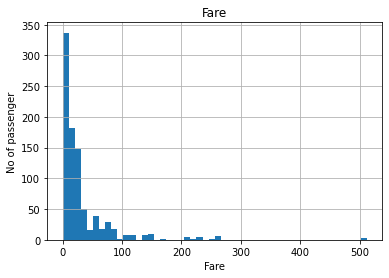

In [25]:
figure=df.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passenger')

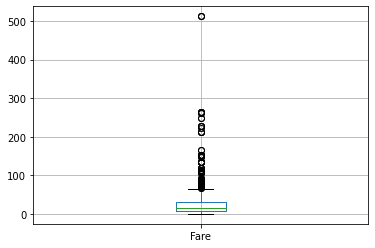

In [27]:
figure=df.boxplot(column='Fare')

In [30]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [32]:
IQR=df.Fare.quantile(0.75)-df.Fare.quantile(0.25)
IQR

23.0896

In [33]:
lower_bridge=df.Fare.quantile(0.25)-(IQR*1.5)
upper_bridge=df.Fare.quantile(0.75)+(IQR*1.5)

print(lower_bridge),print(upper_bridge)

-26.724
65.6344


(None, None)

In [35]:
lower_bridge=df.Fare.quantile(0.25)-(IQR*3)
upper_bridge=df.Fare.quantile(0.75)+(IQR*3)

print(lower_bridge),print(upper_bridge)

-61.358399999999996
100.2688


(None, None)

In [36]:
data=df.copy()

In [37]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
data.loc[data['Age']>=73,'Age']=73

In [39]:
data.loc[data['Fare']>=100,'Fare']=100

Text(0, 0.5, 'No of passenger')

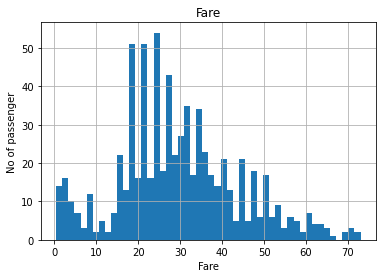

In [40]:
figure=data.Age.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passenger')